In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.layers import Input, Dense, Flatten
from keras.models import Model
import os
from sklearn.model_selection import train_test_split
from generator import DataGenerator
from skimage.transform import resize


Using TensorFlow backend.


In [2]:
not_person = {i[0:-4]:0 for i in os.listdir('./not_person/')}
person = {i[0:-4]:1 for i in os.listdir('./person_dataset/')}
labels = {**not_person, **person}

In [3]:
mydataset = os.listdir('./mydataset/')
mydataset = [i[0:-4] for i in mydataset]
train, validatoin = train_test_split(mydataset, shuffle=True, test_size = .2, random_state = 90)
partition ={'train': train, 'validation': validatoin}


In [4]:
train_generator = DataGenerator(partition['train'], labels=labels,path = '../person_/mydataset/')
validation_generator = DataGenerator(partition['validation'], labels=labels, path='../person_/mydataset/')

In [19]:
img_in = Input((120,360,3))              #input of model 
model = keras.applications.mobilenet_v2.MobileNetV2(include_top=False,
                                                    weights='imagenet', 
                                                    input_tensor=img_in,
                                                    pooling=None, classes=1)

x = model.output
x= Flatten()(x)
predictions = Dense(1, activation="sigmoid", name="predictions")(x)    # fuly connected layer for predict class 
model = Model(inputs=img_in, outputs=predictions)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:306: UserWarning: MobileNet shape is undefined. Weights for input shape(224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [20]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 120, 360, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 121, 361, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 60, 180, 32)  864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 60, 180, 32)  128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [21]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[keras.metrics.binary_accuracy])
model.fit_generator(generator=train_generator,
                    validation_data=validation_generator)

Epoch 1/1
23/23 [==============================] - 274s 12s/step - loss: 0.5495 - binary_accuracy: 0.8587 - val_loss: 0.7133 - val_binary_accuracy: 0.8938


In [23]:
model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs = 3)

Epoch 1/3
23/23 [==============================] - 279s 12s/step - loss: 0.1387 - binary_accuracy: 0.9538 - val_loss: 0.4593 - val_binary_accuracy: 0.9437
Epoch 2/3
23/23 [==============================] - 258s 11s/step - loss: 0.1396 - binary_accuracy: 0.9674 - val_loss: 0.5393 - val_binary_accuracy: 0.9375
Epoch 3/3
23/23 [==============================] - 249s 11s/step - loss: 0.1583 - binary_accuracy: 0.9715 - val_loss: 0.5121 - val_binary_accuracy: 0.9437


In [5]:
from PIL import Image

In [34]:
# a= Image.open('/home/msadegh/Pictures/Screenshot from 2019-01-14 01-03-16.png')
a= Image.open('./2.jpg')

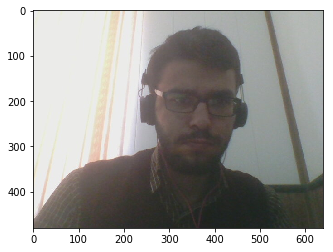

In [35]:
plt.imshow(a)

In [51]:
image_array = np.asarray(a)
image_array = image_array / 255.
image_array = resize(image_array, (120, 360), mode= 'constant', anti_aliasing=True)


In [52]:
X = np.empty((1, 120, 360,3))
X[0,] = image_array

In [53]:
b= model.predict(X)

In [54]:
b

array([[1.]], dtype=float32)

In [55]:
b[0][0] > .7

True

In [50]:
model.save('./mymodel')

In [4]:
model = keras.models.load_model('./mymodel')

In [ ]:
model.pred